<a href="https://colab.research.google.com/github/Samuel-Gonzalez22/Evaluaciones-Python/blob/main/Evaluaci%C3%B3n_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 3
## Python Aplicado a la Ingeniería 202520

**Docente:** Miguel Ortiz

**Estudiante:** Samuel González

**Correo:** samuel.gonzalezn@upb.edu.co

**Fecha:** 10/09/25

Manejo de archivos con Numpy

Sube tu archivo GHI_Temp_Daily_Hourly_2024.csv:
[[2.024e+03 1.000e+00 1.000e+00 0.000e+00 2.730e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 1.000e+00 2.680e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 2.000e+00 2.640e+01 0.000e+00]
 ...
 [2.024e+03 1.200e+01 3.100e+01 2.200e+01 2.740e+01 8.100e+01]
 [2.024e+03 1.200e+01 3.100e+01 2.300e+01 2.590e+01 0.000e+00]
 [2.024e+03 1.200e+01 3.100e+01 2.300e+01 2.590e+01 0.000e+00]]
Tamaño del archivo (shape): (8785, 6)
Número total de filas: 8785
Número total de columnas: 6

Pregunta: ¿Cuántas filas y columnas tiene tu archivo? ¿Qué representa cada fila?
Respuesta: Cada fila representa un registro horario con datos de fecha, hora, temperatura y radiación solar
Filtrando datos para: 2/2/2024
✓ Datos filtrados creados
Datos filtrados completos:
[[2.024e+03 2.000e+00 2.000e+00 0.000e+00 2.730e+01 0.000e+00]
 [2.024e+03 2.000e+00 2.000e+00 1.000e+00 2.680e+01 0.000e+00]
 [2.024e+03 2.000e+00 2.000e+00 2.000e+00 2.640e+01 0.000e+00]
 [2.024e+03

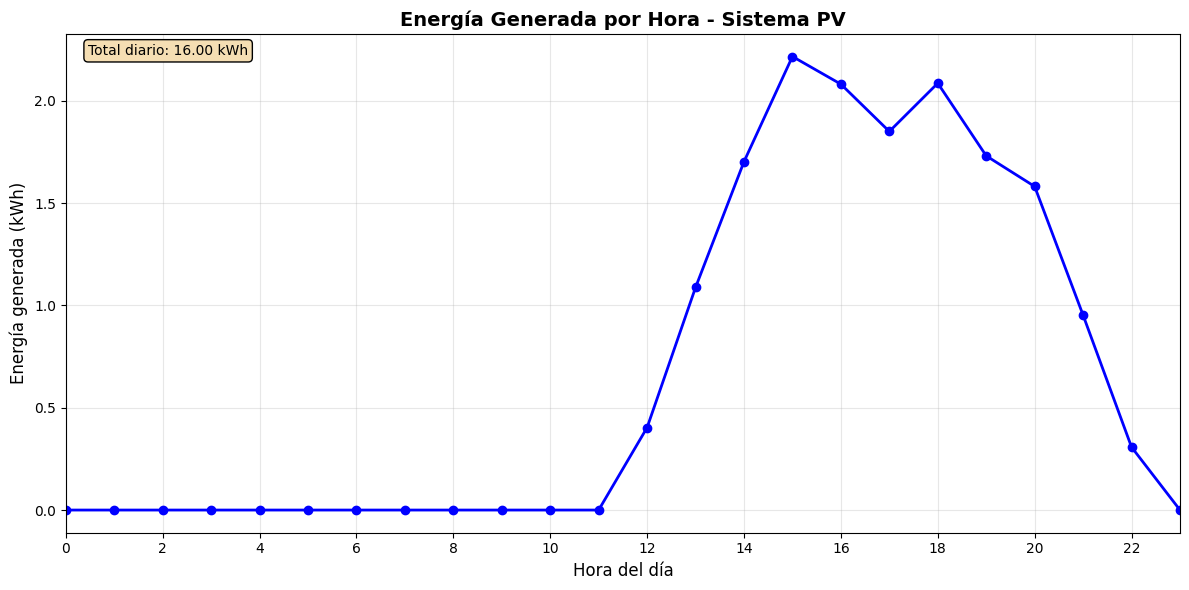

✓ Gráfica generada exitosamente

Archivos generados:
- Archivos de datos filtrados: filtered_data_YYYY_MM_DD.csv
- Archivos de energía: energy_data_YYYY_MM_DD.csv

La función energy_calculations está lista para usar con cualquier fecha y configuración!


In [29]:
# Parte 1: Filtrado de datos

from google.colab import files
import numpy as np

print("Sube tu archivo GHI_Temp_Daily_Hourly_2024.csv:")

import numpy as np
try:
    data = np.genfromtxt('GHI_Temp_Daily_Hourly_2024.csv',
                        skip_header=True,
                        delimiter=';')
    print(data)

    # Imprimir el tamaño del archivo
    print(f"Tamaño del archivo (shape): {data.shape}")

    # Imprimir número de filas y columnas por separado
    print(f"Número total de filas: {data.shape[0]}")
    print(f"Número total de columnas: {data.shape[1]}")

    # Pregunta
    print("\nPregunta: ¿Cuántas filas y columnas tiene tu archivo? ¿Qué representa cada fila?")
    print("Respuesta: Cada fila representa un registro horario con datos de fecha, hora, temperatura y radiación solar")

    # Definir variables para filtrar
    year = 2024
    month = 2
    day = 2

    print(f"Filtrando datos para: {day}/{month}/{year}")

    # Siendo que las columnas son: Year(0), Month(1), Day(2), Hour(3), Temperature(4) y GH(5)
    filtered_data = data[(data[:, 0].astype(int) == year) & (data[:, 1].astype(int) == month) & (data[:, 2].astype(int) == day)]

    print(f"✓ Datos filtrados creados")

    # Imprimir los datos filtrados
    print("Datos filtrados completos:")
    print(filtered_data)

    # Imprimir cantidad de registros
    print(f"\nCantidad de registros encontrados: {len(filtered_data)}")

    # Mensaje informativo
    print(f"\nDatos filtrados para la fecha: {day}/{month}/{year}")

    # Pregunta
    print(f"\nPregunta: ¿Cuántos registros encontraste para esa fecha? ¿Te parece lógico ese número?")
    print(f"Respuesta: Se encontraron {len(filtered_data)} registros. Para un día completo, deberían ser 24 registros (uno por hora)")

    def filter_data_by_date(filepath, year, month, day):
        """
        Filtra datos de un archivo CSV por fecha específica y crea un archivo CSV con los resultados
        """
        try:
            # Cargar datos
            data = np.genfromtxt(filepath, skip_header=True, delimiter=';')

            # Filtrar datos por fecha
            filtered_data = data[(data[:, 0].astype(int) == year) & (data[:, 1].astype(int) == month) & (data[:, 2].astype(int) == day)]

            # Validación: si no hay datos, mostrar mensaje y terminar
            if len(filtered_data) == 0:
                print(f"No se encontraron datos para la fecha {day}/{month}/{year}")
                return

            # Crear nombre del archivo
            filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"
            with open(filename, 'w') as file:
                file.write("Year,Month,Day,Hour,Temperature,GHI\n")
                for row in filtered_data:
                    file.write(f"{int(row[0])},{int(row[1])},{int(row[2])},{int(row[3])},{row[4]:.2f},{row[5]:.2f}\n")
            print(f"✓ Archivo '{filename}' creado exitosamente con {len(filtered_data)} registros")

        except FileNotFoundError:
            print(f"Error: No se encontró el archivo '{filepath}'")
        except IndexError:
            print("Error: El archivo no tiene el formato esperado")
        except Exception as e:
            print(f"Error inesperado: {e}")

    print("✓ Función completa definida")

    # Probar la función
    filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 2, 2)

    if __name__ == "__main__":
        print("Ejecutando pruebas finales:")

        # Prueba con fecha que existe
        print("\n1. Prueba con fecha existente (2 febrero 2024):")
        filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 2, 2)

        # Prueba con fecha que no existe
        print("\n2. Prueba con fecha inexistente (30 febrero 2024):")
        filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 2, 30)

        # Prueba con archivo que no existe
        print("\n3. Prueba con archivo inexistente:")
        filter_data_by_date('archivo_inexistente.csv', 2024, 9, 26)

        # Pruebas con fechas diferentes válidas
        print("\n4. Prueba con otra fecha válida (15 junio 2024):")
        filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 6, 15)

        print("\n5. Prueba con otra fecha válida (25 diciembre 2024):")
        filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 12, 25)

    print("Archivos CSV creados en tu carpeta de trabajo:")
    print("- filtered_data_2024_02_02.csv")
    print("- filtered_data_2024_06_15.csv")
    print("- filtered_data_2024_12_25.csv")

except FileNotFoundError:
    print("Error: The file GHI_Temp_Daily_Hourly_2024.csv was not found. Please upload it.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Parte 2: Modelado de un sistema PV

# Asegúrate de que tienes la función filter_data_by_date de la Parte 1
def filter_data_by_date(filepath, year, month, day):
    """
    Filtra datos de un archivo CSV por fecha específica y crea un archivo CSV con los resultados
    """
    try:
        # Cargar datos
        data = np.genfromtxt(filepath, skip_header=True, delimiter=';')

        # Filtrar datos por fecha
        filtered_data = data[(data[:, 0].astype(int) == year) & (data[:, 1].astype(int) == month) & (data[:, 2].astype(int) == day)]

        # Validación: si no hay datos, mostrar mensaje y terminar
        if len(filtered_data) == 0:
            print(f"No se encontraron datos para la fecha {day}/{month}/{year}")
            return

        # Crear nombre del archivo
        filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"
        with open(filename, 'w') as file:
            file.write("Year,Month,Day,Hour,Temperature,GHI\n")
            for row in filtered_data:
                file.write(f"{int(row[0])},{int(row[1])},{int(row[2])},{int(row[3])},{row[4]:.2f},{row[5]:.2f}\n")
        print(f"✓ Archivo '{filename}' creado exitosamente con {len(filtered_data)} registros")

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{filepath}'")
    except IndexError:
        print("Error: El archivo no tiene el formato esperado")
    except Exception as e:
        print(f"Error inesperado: {e}")

# Invocar la función filter_data_by_date para una fecha válida
print("Generando archivo filtrado para 2 de febrero de 2024...")
filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 2, 2)

# Cargar los datos filtrados generados
try:
    ghi_temp_data = np.genfromtxt('filtered_data_2024_02_02.csv', skip_header=True, delimiter=',')
    print("✓ Datos filtrados cargados exitosamente")

    # Imprimir los datos cargados y verificar el tamaño
    print(f"Datos cargados:")
    print(ghi_temp_data)
    print(f"Tamaño del array: {ghi_temp_data.shape}")

except Exception as e:
    print(f"Error al cargar datos filtrados: {e}")

# Extraer las columnas de hora, temperatura y ghi
hours = ghi_temp_data[:, 3]        # Columna hora
temp = ghi_temp_data[:, 4]         # Columna temperatura
ghi = ghi_temp_data[:, 5]          # Columna ghi

print("Horas extraídas:")
print(hours)
print(f"\nTemperaturas extraídas (°C):")
print(temp)
print(f"\nRadiación GHI extraída (W/m²):")
print(ghi)

# Definir constantes del sistema
stc_temp = 25                        # Temperatura estándar en °C
temp_coeff = -0.004                  # Coeficiente de temperatura (-0.4%/°C)
panel_area = 1.65                    # Área del panel (m²)
panel_efficiency = 0.2               # Eficiencia del panel (20%)
n_panels = 10                        # Número de paneles
total_area = panel_area * n_panels   # Área total del sistema
inverter_efficiency = 0.95           # Eficiencia del Inversor (95%)

print(f"Parámetros del sistema PV:")
print(f"- Temperatura estándar: {stc_temp}°C")
print(f"- Coeficiente de temperatura: {temp_coeff}/°C")
print(f"- Área por panel: {panel_area} m²")
print(f"- Eficiencia del panel: {panel_efficiency*100}%")
print(f"- Número de paneles: {n_panels}")
print(f"- Área total del sistema: {total_area} m²")
print(f"- Eficiencia del inversor: {inverter_efficiency*100}%")

# Calcular la corrección por temperatura
temp_correction = 1 + temp_coeff * (temp - stc_temp)

print("Corrección por temperatura calculada:")
print(temp_correction)
print(f"Rango de corrección: {np.min(temp_correction):.3f} a {np.max(temp_correction):.3f}")

# Calcular la potencia DC
dc_power = ghi * total_area * panel_efficiency * temp_correction

print("Potencia DC calculada (W):")
print(dc_power)

# Calcular la potencia AC aplicando la eficiencia del inversor
ac_power = dc_power * inverter_efficiency

print("\nPotencia AC calculada (W):")
print(ac_power)

# Imprimir estadísticas de potencia
print(f"\n--- ESTADÍSTICAS DE POTENCIA ---")
print(f"Potencia DC - Promedio: {np.mean(dc_power):.2f} W")
print(f"Potencia DC - Máxima: {np.max(dc_power):.2f} W")
print(f"Potencia AC - Promedio: {np.mean(ac_power):.2f} W")
print(f"Potencia AC - Máxima: {np.max(ac_power):.2f} W")

# Calcular la energía generada (asumiendo valores horarios)
hourly_energy_kwh = ac_power / 1000  # Convertir de W a kWh

print("Energía horaria calculada (kWh):")
print(hourly_energy_kwh)

# Calcular e imprimir la energía total generada
total_energy_kwh = np.sum(hourly_energy_kwh)

print(f"\n--- ENERGÍA TOTAL GENERADA ---")
print(f"Energía total del día: {total_energy_kwh:.2f} kWh")

# Crear un archivo para almacenar los datos de generación de energía
energy_filename = "energy_data_2024_01_01.csv"

with open(energy_filename, 'w') as datafile:
    # Escribir encabezado
    datafile.write("Hour,Power_DC,Power_AC,Energy_kWh\n")

    # Escribir datos
    for i in range(len(hours)):
        datafile.write(f"{int(hours[i])},{dc_power[i]:.2f},{ac_power[i]:.2f},{hourly_energy_kwh[i]:.2f}\n")

print(f"✓ Archivo '{energy_filename}' creado exitosamente")

# Imprimir mensajes informativos
print(f"\n--- RESUMEN DEL ANÁLISIS ---")
print(f"Número de registros cargados: {len(hours)}")
print(f"Potencia promedio DC: {np.mean(dc_power):.2f} W")
print(f"Potencia promedio AC: {np.mean(ac_power):.2f} W")
print(f"Energía total producida: {total_energy_kwh:.2f} kWh")

def energy_calculations(filepath, year, month, day, n_panels, panel_area, panel_efficiency, inverter_efficiency, stc_temp=25, temp_coeff=-0.004):
    """
    Función completa que integra el filtrado y realiza los cálculos de energía

    Parámetros:
    filepath: archivo CSV original con todos los datos
    year, month, day: fecha específica a analizar
    n_panels: número de paneles del sistema
    panel_area: área de cada panel en m²
    panel_efficiency: eficiencia de los paneles (0-1)
    inverter_efficiency: eficiencia del inversor (0-1)
    stc_temp: temperatura estándar (default 25°C)
    temp_coeff: coeficiente de temperatura (default -0.004)
    """

    print(f"\n{'='*60}")
    print(f"ANÁLISIS ENERGÉTICO PARA {day}/{month}/{year}")
    print(f"{'='*60}")

    try:
        # Crear nombres de archivos
        filtered_data_filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"
        energy_data_filename = f"energy_data_{year}_{month:02d}_{day:02d}.csv"

        # Invocar función de filtrado
        print("1. Filtrando datos...")
        filter_data_by_date(filepath, year, month, day)

        # Cargar datos filtrados
        print("2. Cargando datos filtrados...")
        ghi_temp_data = np.genfromtxt(filtered_data_filename, skip_header=True, delimiter=',')

        if len(ghi_temp_data) == 0:
            print("No hay datos para procesar.")
            return

        # Extraer columnas
        print("3. Extrayendo columnas...")
        hours = ghi_temp_data[:, 3]
        temp = ghi_temp_data[:, 4]
        ghi = ghi_temp_data[:, 5]

        # Calcular parámetros del sistema
        print("4. Calculando parámetros del sistema...")
        total_area = panel_area * n_panels
        temp_correction = 1 + temp_coeff * (temp - stc_temp)

        # Calcular potencias
        print("5. Calculando potencias...")
        dc_power = ghi * total_area * panel_efficiency * temp_correction
        ac_power = dc_power * inverter_efficiency

        # Calcular energía
        print("6. Calculando energía...")
        hourly_energy_kwh = ac_power / 1000
        total_energy_kwh = np.sum(hourly_energy_kwh)

        # Crear archivo de resultados
        print("7. Creando archivo de resultados...")
        with open(energy_data_filename, 'w') as datafile:
            datafile.write("Hour,Power_DC,Power_AC,Energy_kWh\n")
            for i in range(len(hours)):
                datafile.write(f"{int(hours[i])},{dc_power[i]:.2f},{ac_power[i]:.2f},{hourly_energy_kwh[i]:.2f}\n")

        # Mostrar resultados
        print(f"\n--- RESULTADOS DEL ANÁLISIS ---")
        print(f"Configuración del sistema:")
        print(f"  - Número de paneles: {n_panels}")
        print(f"  - Área por panel: {panel_area} m²")
        print(f"  - Área total: {total_area} m²")
        print(f"  - Eficiencia paneles: {panel_efficiency*100}%")
        print(f"  - Eficiencia inversor: {inverter_efficiency*100}%")
        print(f"\nResultados energéticos:")
        print(f"  - Registros procesados: {len(hours)}")
        print(f"  - Potencia promedio DC: {np.mean(dc_power):.2f} W")
        print(f"  - Potencia máxima DC: {np.max(dc_power):.2f} W")
        print(f"  - Potencia promedio AC: {np.mean(ac_power):.2f} W")
        print(f"  - Potencia máxima AC: {np.max(ac_power):.2f} W")
        print(f"  - Energía total generada: {total_energy_kwh:.2f} kWh")
        print(f"  - Archivo creado: {energy_data_filename}")

        return {
            'hours': hours,
            'dc_power': dc_power,
            'ac_power': ac_power,
            'energy_kwh': hourly_energy_kwh,
            'total_energy': total_energy_kwh
        }

    except FileNotFoundError as e:
        print(f"Error: Archivo no encontrado - {e}")
    except Exception as e:
        print(f"Error inesperado: {e}")
        return None

print("✓ Función energy_calculations creada exitosamente")

# Prueba con la configuración del test requerido
print("Ejecutando test requerido:")
results = energy_calculations("GHI_Temp_Daily_Hourly_2024.csv", 2024, 12, 11, 10, 1.65, 0.2, 0.95)

# Pruebas adicionales con diferentes configuraciones
print("\nPruebas adicionales:")

print("\n--- Prueba 1: Sistema pequeño ---")
energy_calculations("GHI_Temp_Daily_Hourly_2024.csv", 2024, 6, 15, 5, 1.5, 0.18, 0.92)

print("\n--- Prueba 2: Sistema grande ---")
energy_calculations("GHI_Temp_Daily_Hourly_2024.csv", 2024, 3, 21, 20, 2.0, 0.22, 0.96)

try:
    import matplotlib.pyplot as plt

    # Usar los datos del último cálculo
    if results is not None:
        plt.figure(figsize=(12, 6))
        plt.plot(results['hours'], results['energy_kwh'], 'b-o', linewidth=2, markersize=6)
        plt.title('Energía Generada por Hora - Sistema PV', fontsize=14, fontweight='bold')
        plt.xlabel('Hora del día', fontsize=12)
        plt.ylabel('Energía generada (kWh)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 23)
        plt.xticks(range(0, 24, 2))

        # Agregar información del sistema
        plt.text(0.02, 0.98, f'Total diario: {results["total_energy"]:.2f} kWh',
                transform=plt.gca().transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

        plt.tight_layout()
        plt.show()

        print("✓ Gráfica generada exitosamente")
    else:
        print("No hay datos para graficar")

except ImportError:
    print("Matplotlib no está disponible. Para ver la gráfica, instala matplotlib:")
    print("!pip install matplotlib")
except Exception as e:
    print(f"Error al generar la gráfica: {e}")

print("\nArchivos generados:")
print("- Archivos de datos filtrados: filtered_data_YYYY_MM_DD.csv")
print("- Archivos de energía: energy_data_YYYY_MM_DD.csv")
print("\nLa función energy_calculations está lista para usar con cualquier fecha y configuración!")